In [1]:
import pandas as pd
import glob

In [2]:
! du -hs *

93G	RGI70C
81G	RGI70G
724K	_logs
65K	checks.ipynb
477M	node_cache
13K	params.cfg
4.5K	run_slurm.sh
4.5K	run_slurm_L3.sh
8.5K	slurm-426936_1.out
21K	slurm-426936_10.out
8.5K	slurm-426936_11.out
8.5K	slurm-426936_12.out
8.5K	slurm-426936_13.out
21K	slurm-426936_14.out
8.5K	slurm-426936_15.out
8.5K	slurm-426936_16.out
25K	slurm-426936_17.out
8.5K	slurm-426936_18.out
8.5K	slurm-426936_19.out
8.5K	slurm-426936_2.out
8.5K	slurm-426936_3.out
21K	slurm-426936_4.out
8.5K	slurm-426936_5.out
8.5K	slurm-426936_6.out
8.5K	slurm-426936_7.out
8.5K	slurm-426936_8.out
8.5K	slurm-426936_9.out
8.5K	slurm-426955_6.out


In [2]:
fs = sorted(glob.glob('RGI70C/b_040/L2/summary/glacier_statistics_*.csv'))
df = []
for f in fs:
    df.append(pd.read_csv(f, index_col=0, low_memory=False))
df = pd.concat(df)

In [3]:
fs = sorted(glob.glob('RGI70C/b_040/L2/summary/millan_statistics_*.csv'))
dfm = []
for f in fs:
    dfm.append(pd.read_csv(f, index_col=0, low_memory=False))
dfm = pd.concat(dfm)

In [4]:
fs = sorted(glob.glob('RGI70C/b_040/L2/summary/itslive_statistics_*.csv'))
dfi = []
for f in fs:
    dfi.append(pd.read_csv(f, index_col=0, low_memory=False))
dfi = pd.concat(dfi)

In [5]:
fs = sorted(glob.glob('RGI70C/b_040/L2/summary/glathida_statistics_*.csv'))
dfg = []
for f in fs:
    dfg.append(pd.read_csv(f, index_col=0, low_memory=False))
dfg = pd.concat(dfg)

In [6]:
dfi

rgi_region rgi_subregion  rgi_area_km2  \
rgi_id                                                            
RGI2000-v7.0-C-01-00001           1         01-01      0.239199   
RGI2000-v7.0-C-01-00002           1         01-01      0.104641   
RGI2000-v7.0-C-01-00003           1         01-01      0.216605   
RGI2000-v7.0-C-01-00004           1         01-01      0.252649   
RGI2000-v7.0-C-01-00005           1         01-01      0.474716   
...                             ...           ...           ...   
RGI2000-v7.0-C-19-01597          19         19-24    188.556385   
RGI2000-v7.0-C-19-01598          19         19-24    503.235510   
RGI2000-v7.0-C-19-01599          19         19-24     48.779761   
RGI2000-v7.0-C-19-01600          19         19-24    443.394111   
RGI2000-v7.0-C-19-01601          19         19-24    465.811025   

                         itslive_avg_vel  itslive_max_vel  itslive_perc_cov  
rgi_id                                                                       
RGI2000-v7.0-C-01-00001              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00002              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00003              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00004              NaN              NaN               NaN  
RGI2000-v7.0-C-01-00005              NaN              NaN               NaN  
...                                  ...              ...               ...  
RGI2000-v7.0-C-19-01597         8.107013        58.198875          0.999383  
RGI2000-v7.0-C-19-01598        11.071066       142.767105          1.000088  
RGI2000-v7.0-C-19-01599         6.385927        32.992664          0.999646  
RGI2000-v7.0-C-19-01600         5.956131        31.897158          0.999562  
RGI2000-v7.0-C-19-01601         9.102854        46.242519          0.999976  

[192869 rows x 6 columns]

In [7]:
dfms = dfm.loc[dfm.millan_vel_perc_cov > 0.2].copy()
dfis = dfi.loc[dfi.itslive_perc_cov > 0.2].copy()

In [8]:
avalid = dfms.groupby(dfms.rgi_region)[['rgi_area_km2']].sum()
perc_valid_millan = avalid / df.groupby(df.rgi_region)[['rgi_area_km2']].sum()

In [9]:
avalid = dfis.groupby(dfis.rgi_region)[['rgi_area_km2']].sum()
perc_valid_itslive = avalid / df.groupby(df.rgi_region)[['rgi_area_km2']].sum()

In [10]:
perc_valid_millan.columns = ['Millan (%)']

In [11]:
perc_valid_millan['ITS-LIVE (%)'] = perc_valid_itslive

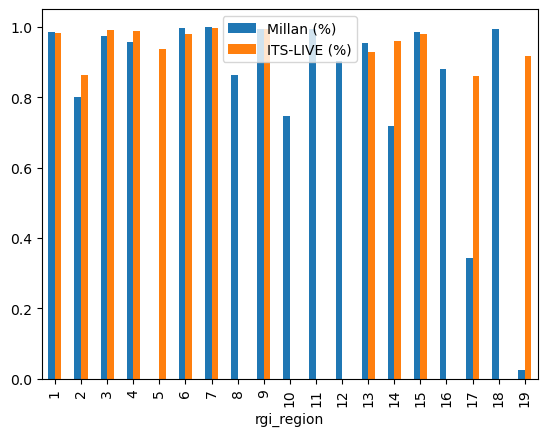

In [12]:
perc_valid_millan.plot(kind='bar');

In [13]:
import numpy as np
with pd.HDFStore('../../../../glathida/glathida-main/data/glathida_2023-11-16_rgi_70C_per_id.h5') as store:
    rgi_ids = list(store.keys())
    rgi_ids = np.array([s[1:] for s in rgi_ids])

In [34]:
dfg.loc[(dfg.n_valid_thick_points < dfg.n_points * 0.5) & (dfg.n_valid_thick_points > 10)]

rgi_region rgi_subregion  rgi_area_km2  n_points  \
rgi_id                                                                      
RGI2000-v7.0-C-03-00228           3         03-01   1675.091817       354   
RGI2000-v7.0-C-03-01548           3         03-03      0.244806       116   
RGI2000-v7.0-C-03-01744           3         03-03      1.754576       140   
RGI2000-v7.0-C-03-02191           3         03-05      9.962530       140   
RGI2000-v7.0-C-03-02209           3         03-05      2.764438       153   
RGI2000-v7.0-C-03-02379           3         03-06      5.767288        88   
RGI2000-v7.0-C-04-02646           4         04-06     14.984460       219   
RGI2000-v7.0-C-04-02722           4         04-06      5.248692       166   
RGI2000-v7.0-C-04-02873           4         04-06      8.077466        70   
RGI2000-v7.0-C-04-03022           4         04-06    203.180986       749   
RGI2000-v7.0-C-04-04328           4         04-06      5.618400       146   
RGI2000-v7.0-C-04-04433           4         04-07      5.530617       190   
RGI2000-v7.0-C-04-04459           4         04-07      9.438558       251   
RGI2000-v7.0-C-05-00098           5         05-01     19.987650       680   
RGI2000-v7.0-C-05-00136           5         05-01     11.382726       316   
RGI2000-v7.0-C-05-00355           5         05-01      7.450141       258   
RGI2000-v7.0-C-05-00384           5         05-01    111.268495       506   
RGI2000-v7.0-C-05-00446           5         05-01     29.949202       282   
RGI2000-v7.0-C-05-00503           5         05-01     39.705826       870   
RGI2000-v7.0-C-05-00549           5         05-01      7.793249        88   
RGI2000-v7.0-C-05-00588           5         05-01      0.187341        59   
RGI2000-v7.0-C-05-00625           5         05-01      3.280140        88   
RGI2000-v7.0-C-05-01029           5         05-01     23.500359      1699   
RGI2000-v7.0-C-05-01427           5         05-01     26.957538       170   
RGI2000-v7.0-C-05-01479           5         05-01     63.404229       106   
RGI2000-v7.0-C-05-01538           5         05-01     80.601881       276   
RGI2000-v7.0-C-05-01562           5         05-01     53.575276       247   
RGI2000-v7.0-C-05-01976           5         05-01      9.961239       270   
RGI2000-v7.0-C-05-01986           5         05-01    130.951315      3215   
RGI2000-v7.0-C-05-03175           5         05-01      1.120494        92   
RGI2000-v7.0-C-05-03177           5         05-01      0.277417        70   
RGI2000-v7.0-C-05-06094           5         05-01     12.088125       876   
RGI2000-v7.0-C-05-06099           5         05-01    105.656085      1040   
RGI2000-v7.0-C-05-06239           5         05-01     85.667393       306   
RGI2000-v7.0-C-05-06701           5         05-01    263.460008       853   
RGI2000-v7.0-C-05-06866           5         05-01      2.916811       120   
RGI2000-v7.0-C-05-07039           5         05-01      1.975153        89   
RGI2000-v7.0-C-05-07179           5         05-01     36.985097       319   
RGI2000-v7.0-C-05-07206           5         05-01      0.197702        63   
RGI2000-v7.0-C-05-07360           5         05-01      2.454931        79   
RGI2000-v7.0-C-05-07571           5         05-01    120.358413       102   
RGI2000-v7.0-C-05-07764           5         05-01     40.384511       160   
RGI2000-v7.0-C-05-07923           5         05-01    133.782284       507   
RGI2000-v7.0-C-05-08254           5         05-01      6.380712        76   
RGI2000-v7.0-C-05-08471           5         05-01     21.009030       398   
RGI2000-v7.0-C-05-08654           5         05-01     14.384320      1021   
RGI2000-v7.0-C-05-08663           5         05-01     21.642601       920   
RGI2000-v7.0-C-05-09082           5         05-01      1.987595       324   
RGI2000-v7.0-C-05-10052           5         05-01     22.960623       304   
RGI2000-v7.0-C-05-10317           5         05-01      2.003296        83   
RGI2000-v7.0-C-05-111

In [16]:
len(rgi_ids)

1278

In [17]:
dfg.loc['RGI2000-v7.0-C-03-00219']

rgi_region                       3
rgi_subregion                03-01
rgi_area_km2              3.667868
n_points                       120
n_valid_thick_points             0
n_valid_elev_points            120
n_valid_gridded_points           0
avg_thick                      NaN
max_thick                      NaN
date_mode                      NaN
date_min                       NaN
date_max                       NaN
Name: RGI2000-v7.0-C-03-00219, dtype: object

In [18]:
gtdf = pd.read_hdf('../../../../glathida/glathida-main/data/glathida_2023-11-16_rgi_70C_per_id.h5', key='RGI2000-v7.0-C-03-00219')

In [19]:
gtdf

survey_id        date elevation_date   latitude  longitude  elevation  \
0          248  2012-05-17     2012-05-17  80.797359 -82.374263      820.0   
1          248  2012-05-17     2012-05-17  80.797304 -82.375909      817.0   
2          248  2012-05-17     2012-05-17  80.797249 -82.377530      814.0   
3          248  2012-05-17     2012-05-17  80.797194 -82.379176      811.0   
4          248  2012-05-17     2012-05-17  80.797138 -82.380821      808.0   
..         ...         ...            ...        ...        ...        ...   
115        248  2012-05-17     2012-05-17  80.792475 -82.481301      679.0   
116        248  2012-05-17     2012-05-17  80.792379 -82.482861      678.0   
117        248  2012-05-17     2012-05-17  80.792282 -82.484431      676.0   
118        248  2012-05-17     2012-05-17  80.792184 -82.485988      675.0   
119        248  2012-05-17     2012-05-17  80.792086 -82.487556      673.0   

     thickness  thickness_uncertainty flag                   rgi_id  
0            0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
1            0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
2            0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
3            0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
4            0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
..         ...                    ...  ...                      ...  
115          0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
116          0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
117          0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
118          0                    NaN  NaN  RGI2000-v7.0-C-03-00219  
119          0                    NaN  NaN  RGI2000-v7.0-C-03-00219  

[120 rows x 10 columns]

In [20]:
df.dem_source.unique()

array(['COPDEM30', 'COPDEM90', 'NASADEM'], dtype=object)

In [21]:
df.loc[df.dem_med_elev.isnull()]

rgi_region rgi_subregion  name     cenlon     cenlat  \
rgi_id                                                                          
RGI2000-v7.0-C-04-00527           4         04-03   NaN -84.041589  73.294664   
RGI2000-v7.0-C-04-00864           4         04-03   NaN -84.458567  73.000620   
RGI2000-v7.0-C-12-01378          12         12-01   NaN  46.703337  41.960324   
RGI2000-v7.0-C-12-01379          12         12-01   NaN  46.695517  41.957207   
RGI2000-v7.0-C-12-01380          12         12-01   NaN  46.658509  41.954966   
...                             ...           ...   ...        ...        ...   
RGI2000-v7.0-C-19-01372          19         19-20   NaN -61.493143 -64.515108   
RGI2000-v7.0-C-19-01418          19         19-20   NaN -66.718770 -68.195338   
RGI2000-v7.0-C-19-01419          19         19-20   NaN -66.720660 -68.204525   
RGI2000-v7.0-C-19-01571          19         19-21   NaN -54.720919 -63.436136   
RGI2000-v7.0-C-19-01572          19         19-21   NaN -56.589897 -64.229125   

                         rgi_area_km2  rgi_year     glacier_type  \
rgi_id                                                             
RGI2000-v7.0-C-04-00527      0.010356      2000  Glacier complex   
RGI2000-v7.0-C-04-00864      0.011030      2000  Glacier complex   
RGI2000-v7.0-C-12-01378      0.341187      2000  Glacier complex   
RGI2000-v7.0-C-12-01379      0.100726      2000  Glacier complex   
RGI2000-v7.0-C-12-01380      0.190444      2000  Glacier complex   
...                               ...       ...              ...   
RGI2000-v7.0-C-19-01372      0.023061      2000  Glacier complex   
RGI2000-v7.0-C-19-01418      0.034402      2000  Glacier complex   
RGI2000-v7.0-C-19-01419      0.054456      2000  Glacier complex   
RGI2000-v7.0-C-19-01571      0.785394      2000  Glacier complex   
RGI2000-v7.0-C-19-01572      0.047745      2000  Glacier complex   

                        terminus_type  is_tidewater  ... flowline_min_elev  \
rgi_id                                               ...                     
RGI2000-v7.0-C-04-00527  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-04-00864  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01378  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01379  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-12-01380  Not assigned         False  ...               NaN   
...                               ...           ...  ...               ...   
RGI2000-v7.0-C-19-01372  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01418  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01419  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01571  Not assigned         False  ...               NaN   
RGI2000-v7.0-C-19-01572  Not assigned         False  ...               NaN   

                         flowline_avg_slope  flowline_avg_width  \
rgi_id                                                            
RGI2000-v7.0-C-04-00527                 NaN                 NaN   
RGI2000-v7.0-C-04-00864                 NaN                 NaN   
RGI2000-v7.0-C-12-01378                 NaN                 NaN   
RGI2000-v7.0-C-12-01379                 NaN                 NaN   
RGI2000-v7.0-C-12-01380                 NaN                 NaN   
...                                     ...                 ...   
RGI2000-v7.0-C-19-01372                 NaN                 NaN   
RGI2000-v7.0-C-19-01418                 NaN                 NaN   
RGI2000-v7.0-C-19-01419                 NaN                 NaN   
RGI2000-v7.0-C-19-01571                 NaN                 NaN   
RGI2000-v7.0-C-19-01572                 NaN                 NaN   

                         flowline_last_width flowline_last_5_widths  \
rgi_id                                                                
RGI2000-v7.0-C-04-00527                  NaN             

In [22]:
import matplotlib.pyplot as plt

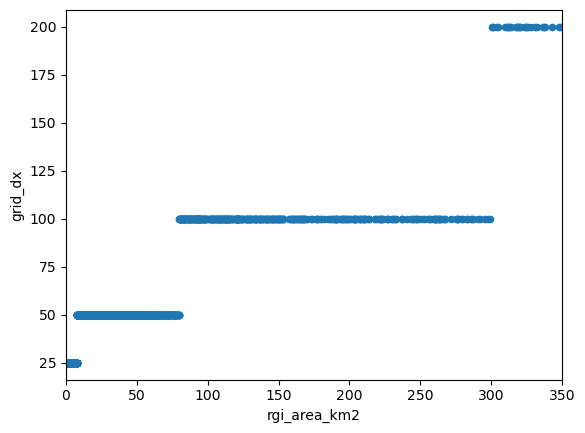

In [23]:
df.plot(kind='scatter', x='rgi_area_km2', y='grid_dx');
plt.xlim(0, 350);

In [24]:
shp = df.copy()

In [25]:
shp['grid_nn'] = shp['grid_ny'] * shp['grid_ny']

cat0 = shp.loc[shp.grid_dx == 25].sort_values(by='grid_nn', ascending=False)
cat1 = shp.loc[shp.grid_dx == 50].sort_values(by='grid_nn', ascending=False)
cat2 = shp.loc[shp.grid_dx == 100].sort_values(by='grid_nn', ascending=False)
cat3 = shp.loc[shp.grid_dx == 200].sort_values(by='grid_nn', ascending=False)

sdf = pd.DataFrame()
c = 'N glaciers'
sdf.loc['dx  25', c] = f'{len(cat0):d}'
sdf.loc['dx  50', c] = f'{len(cat1):d}'
sdf.loc['dx 100', c] = f'{len(cat2):d}'
sdf.loc['dx 200', c] = f'{len(cat3):d}'
c = 'Total area (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.rgi_area_km2.sum()):d}'
sdf.loc['dx  50', c] = f'{int(cat1.rgi_area_km2.sum()):d}'
sdf.loc['dx 100', c] = f'{int(cat2.rgi_area_km2.sum()):d}'
sdf.loc['dx 200', c] = f'{int(cat3.rgi_area_km2.sum()):d}'
c = 'max grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[0].grid_nx):d}x{int(cat0.iloc[0].grid_ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[0].grid_nx):d}x{int(cat1.iloc[0].grid_ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[0].grid_nx):d}x{int(cat2.iloc[0].grid_ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[0].grid_nx):d}x{int(cat3.iloc[0].grid_ny):d}'
c = 'min grid points'
sdf.loc['dx  25', c] = f'{int(cat0.iloc[-1].grid_nx):d}x{int(cat0.iloc[-1].grid_ny):d}'
sdf.loc['dx  50', c] = f'{int(cat1.iloc[-1].grid_nx):d}x{int(cat1.iloc[-1].grid_ny):d}'
sdf.loc['dx 100', c] = f'{int(cat2.iloc[-1].grid_nx):d}x{int(cat2.iloc[-1].grid_ny):d}'
sdf.loc['dx 200', c] = f'{int(cat3.iloc[-1].grid_nx):d}x{int(cat3.iloc[-1].grid_ny):d}'
c = 'n glaciers < 10x10=100 grid points'
sdf.loc['dx  25', c] = f'{len(cat0.loc[cat0.grid_nn < 100]):d}'
sdf.loc['dx  50', c] = f'{len(cat1.loc[cat1.grid_nn < 100]):d}'
sdf.loc['dx 100', c] = f'{len(cat2.loc[cat2.grid_nn < 100]):d}'
sdf.loc['dx 200', c] = f'{len(cat3.loc[cat3.grid_nn < 100]):d}'
c = 'total number of grid points (x1e6)'
sdf.loc['dx  25', c] = f'{int(cat0.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx  50', c] = f'{int(cat1.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx 100', c] = f'{int(cat2.grid_nn.sum() * 1e-6):d}'
sdf.loc['dx 200', c] = f'{int(cat3.grid_nn.sum() * 1e-6):d}'

sdf.loc['Total', 'N glaciers'] = sdf['N glaciers'].astype(int).sum()
sdf.loc['Total', 'Total area (x1e6)'] = sdf.iloc[:4]['Total area (x1e6)'].astype(int).sum()
sdf.loc['Total', 'total number of grid points (x1e6)'] = sdf.iloc[:4]['total number of grid points (x1e6)'].astype(int).sum()
sdf.loc['Total', 'n glaciers < 10x10=100 grid points'] = sdf.iloc[:4]['n glaciers < 10x10=100 grid points'].astype(int).sum()
sdf.loc['Total', 'max grid points'] = ''
sdf.loc['Total', 'min grid points'] = ''
sdf

N glaciers Total area (x1e6) max grid points min grid points  \
dx  25     189517             74768         277x525           97x81   
dx  50       2733             60453         403x560         278x123   
dx 100        382             57527         470x547         310x166   
dx 200        237            513994       1358x2261         314x168   
Total      192869            706742                                   

       n glaciers < 10x10=100 grid points total number of grid points (x1e6)  
dx  25                                  0                               2312  
dx  50                                  0                                144  
dx 100                                  0                                 29  
dx 200                                  0                                 49  
Total                                   0                               2534

In [12]:
dfmb = pd.read_csv('RGI70C/b_040/L3/summary/fixed_geometry_mass_balance_13.csv', index_col=0)

In [13]:
dfmb.loc[2000:].mean()

RGI2000-v7.0-C-13-00001   -199.0
RGI2000-v7.0-C-13-00002   -199.0
RGI2000-v7.0-C-13-00003   -199.0
RGI2000-v7.0-C-13-00004   -199.0
RGI2000-v7.0-C-13-00005   -199.0
                           ...  
RGI2000-v7.0-C-13-53383   -199.0
RGI2000-v7.0-C-13-53384   -199.0
RGI2000-v7.0-C-13-53385   -199.0
RGI2000-v7.0-C-13-53386   -199.0
RGI2000-v7.0-C-13-53387   -199.0
Length: 53387, dtype: float64